# Grid resolution study
## Spectra, stable 5m/s case

In [1]:
%%capture
# Important header information
naluhelperdir = '../utilities/'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import windspectra
from matplotlib.lines import Line2D
import yaml
%matplotlib inline
# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

## List of runs to compare

In [2]:
# Locations of all of the runs
baserundir = '../../'
NumReqCols = 3   # Number of required columns in the table

# Index of all runs here
runlist=[
    # Name,                     Location,                                       file, style dict
    # -- NaluWind runs --
    ['Nalu-Wind dx=10m',        'NaluWindRuns/stable/05ms/05ms_iter02/',  'NaluWind_Stable05_spectra_dx10.0_z20.dat',  {'dx':10, 'color':'b', 'lw':0.75, 'lstyle':'-'}],
    ['Nalu-Wind dx=5m',         'NaluWindRuns/stable/05ms/05ms_5x5x2.5/', 'NaluWind_Stable05_spectra_dx05.0_z20.dat',  {'dx':5,  'color':'b', 'lw':0.75, 'lstyle':'--'}],
    ['Nalu-Wind dx=2.5m','NaluWindRuns/stable/05ms/05ms_Good_Mesh_2p5m/', 'NaluWind_Stable05_spectra_dx02.5_z20.dat',  {'dx':2.5,  'color':'b', 'lw':1.25, 'lstyle':'-.'}],
    ['AMR-Wind dx=2.5m',        'AMRWindRuns/stable/05ms/sim_dx2.5/',     'AMRWind_Stable05_spectra_dx02.5_z20.dat',   {'dx':2.5,'color':'r', 'lw':1.25, 'lstyle':'-.'}],
]

# Stuff for saving figures
savefigs = True
figdir   = '../../Paper/figures/'

## Plot spectra

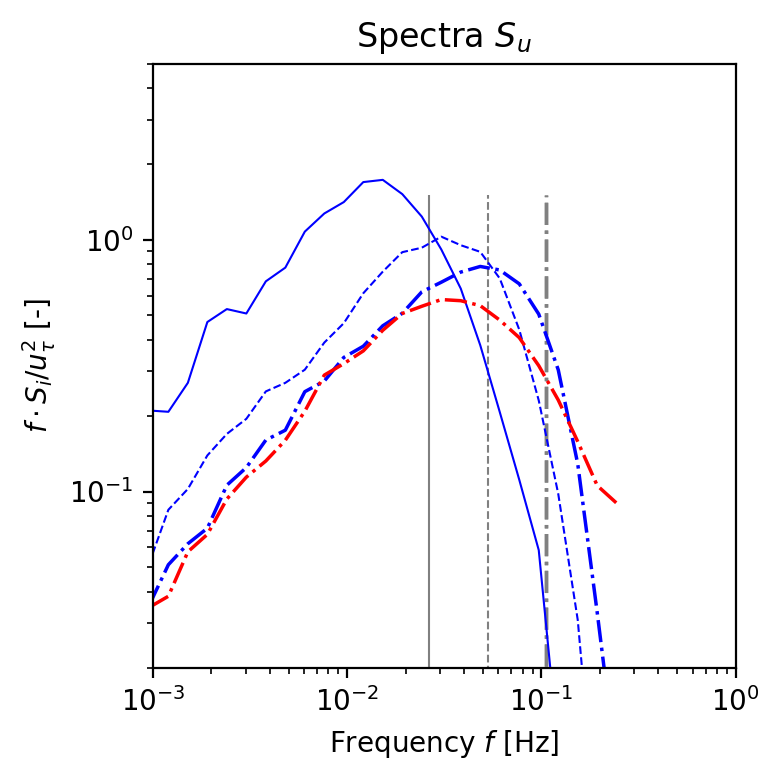

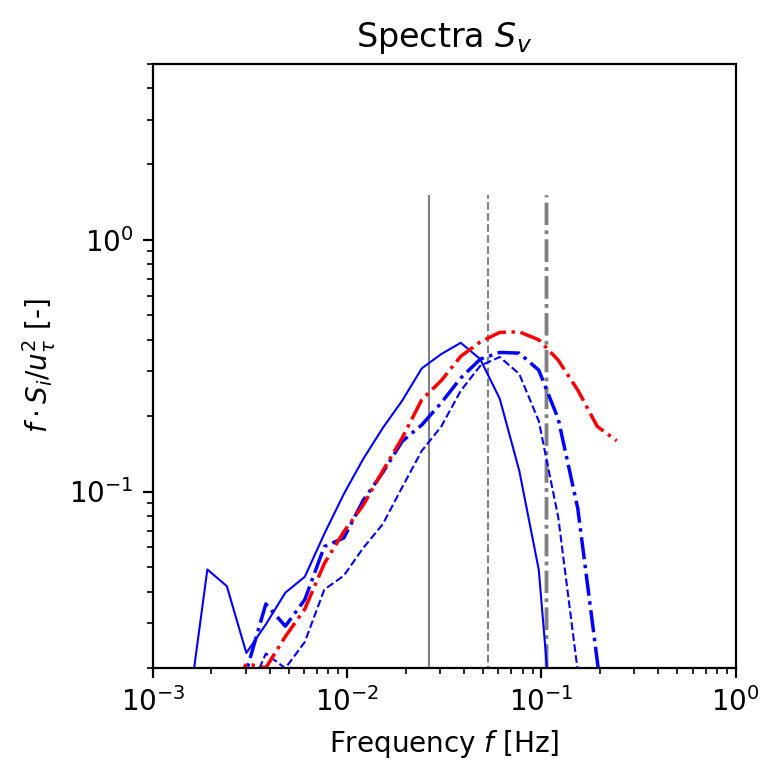

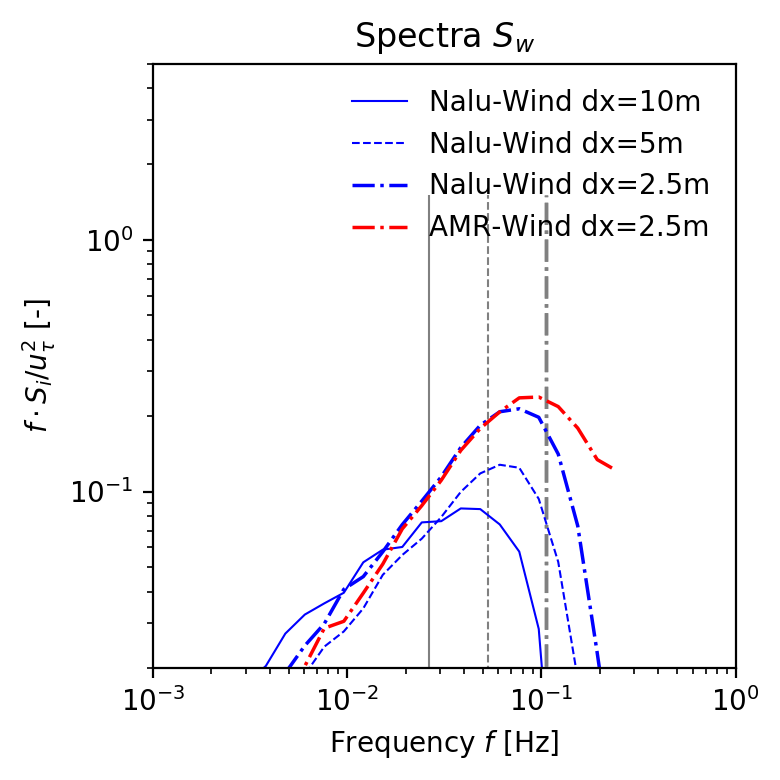

In [3]:
dpi = 200
plt.figure("u",  figsize=(4,4), dpi=dpi)
plt.figure("v",  figsize=(4,4), dpi=dpi)
plt.figure("w",  figsize=(4,4), dpi=dpi)
plt.rc('font', size=10)

Nband = 3 # 1/3 octave band averaging

for irun, run in enumerate(runlist[:]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    rundir   = run[1]
    datafile = run[2]
    
    with open(baserundir+'/'+rundir+'/istats.yaml') as file:
        istats = yaml.load(file) #yaml.load(file, Loader=yaml.FullLoader)
        if 'utau' in istats:   utau = istats['utau']
        if 'ustar' in istats:  utau = istats['ustar']
    #print('utau = '+repr(utau))       
    
    spectra  = np.loadtxt(baserundir+'/'+rundir+'/'+datafile)
    f        = spectra[:,0]
    Suu      = spectra[:,1]
    Svv      = spectra[:,2]
    Sww      = spectra[:,3]
    avgf, avgSuu = windspectra.NarrowToOctaveBand(f, Suu, Nband)
    avgf, avgSvv = windspectra.NarrowToOctaveBand(f, Svv, Nband)
    avgf, avgSww = windspectra.NarrowToOctaveBand(f, Sww, Nband)
    
    plt.figure("u")
    plt.loglog(avgf, avgf*avgSuu/utau**2, linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    plt.figure("v")
    plt.loglog(avgf, avgf*avgSvv/utau**2, linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    plt.figure("w")
    plt.loglog(avgf, avgf*avgSww/utau**2, linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    
    if 'dx' in rundict:
        Ulong = 5
        fmax = 0.6*Ulong/(8*np.sqrt(2)*rundict['dx'])
        # Plot where the spectral cut-off is
        for fi in ['u', 'v', 'w']:
            plt.figure(fi)
            plt.vlines(fmax, 5e-4, 1.5, color='gray', linewidth=lw, linestyle=lstyle)

plt.figure("u")
plt.ylim([2E-2, 5]);
plt.xlim([1E-3, 1]);
#plt.legend(frameon=False, fontsize=10)
plt.xlabel('Frequency $f$ [Hz]');
plt.ylabel('$f\cdot S_{i}/u_{\\tau}^2$ [-]');
plt.title(r'Spectra $S_u$')
#plt.grid()
plt.tight_layout();

plt.figure("v")
plt.ylim([2E-2, 5]);
plt.xlim([1E-3, 1]);
#plt.legend(frameon=False, fontsize=10)
plt.xlabel('Frequency $f$ [Hz]');
plt.ylabel('$f\cdot S_{i}/u_{\\tau}^2$ [-]');
plt.title(r'Spectra $S_v$')
#plt.grid()
plt.tight_layout();

plt.figure("w")
plt.ylim([2E-2, 5]);
plt.xlim([1E-3, 1]);
plt.legend(frameon=False, fontsize=10)
plt.xlabel('Frequency $f$ [Hz]');
plt.ylabel('$f\cdot S_{i}/u_{\\tau}^2$ [-]');
plt.title(r'Spectra $S_w$')
#plt.grid()
plt.tight_layout();

# Save the figures
if savefigs:
    for fi in ['u', 'v', 'w']:
        plt.figure(fi)
        plt.savefig(figdir+'/'+'GridStudy_Spectra_S%s.png'%fi)